# One vs rest

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns


In [2]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [3]:
def optimizar(theta, x_train, y_train):
    sigma = sigmoid(x_train@theta)
    theta = (x_train.T @ (sigma-y_train))
    return theta

In [4]:
def costo(theta, x_train, y_train):
    
    sigma = sigmoid(x_train@theta)
    error = (y_train*np.log(sigma) + (1-y_train)*np.log(1-sigma))
    return np.sum(error, axis= 0)

In [5]:
def gradiente(theta, x_train, y_train, eta = 0.8, n_iter = 10000):
    J = np.zeros(n_iter)
    m = len(x_train)
    for i in range(n_iter):
        J[i] = -(1/m)*costo(theta, x_train, y_train)
        theta = theta - eta * (1/m)*optimizar(theta, x_train, y_train)
    return theta, J

In [6]:
def  vector_comparacion(y_proba_1, y_proba_2, y_proba_1_value, y_proba_2_value):
    comparar = np.concatenate((y_proba_1, y_proba_2), axis =0).T
    prediction_final = []
    for i in range(len(comparar)):
        #print(compar[i])
        valor_max = comparar[i].max()
        #print(compar[i].max())
        if comparar[i][0] == valor_max:
            prediction_final.append(y_proba_1_value)
        elif comparar[i][1] == valor_max:
            prediction_final.append(y_proba_2_value)

    prediction_final = np.array(prediction_final).reshape(1, len(prediction_final))
    last_data = np.concatenate((y_proba_1, y_proba_2, prediction_final), axis =0).T
    return last_data, prediction_final.T


In [7]:
def exclude_data(class_vector, num_exclude):
    vectores = []

    for i in range(len(class_vector)):
        if class_vector[i] != num_exclude:
            vectores.append(i)

    return np.array(vectores)  

In [8]:
iris = datasets.load_iris()

In [9]:
x = iris["data"][::]
y = (iris["target"]).astype(np.int32).reshape(len(iris['target']),1)


In [10]:

for i in range(x.shape[1]):
    max = x[:,i].max()
    min = x[:,i].min()
    x[:,i] = (x[:,i] - min)/(max - min)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [12]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Se aplica la sigueinte Formula $$\frac{n * (n -1)}{2} $$

Debido a que tenemos 3 clases, la formula nos devuelve el valor de 6, con este valor debemos de hacer 6 combinaciones de pares de datos. Estas combinaciones serian:

AB
AC
BC 

Donde:

A = setosa
B = versicolor
C = virginica

# AB

## Setosa vs versicolor

In [13]:
x_train[:10], x_test[:10]

(array([[0.75      , 0.5       , 0.62711864, 0.54166667],
        [0.58333333, 0.5       , 0.72881356, 0.91666667],
        [0.19444444, 0.58333333, 0.10169492, 0.125     ],
        [0.5       , 0.33333333, 0.50847458, 0.5       ],
        [0.22222222, 0.20833333, 0.33898305, 0.41666667],
        [0.47222222, 0.29166667, 0.69491525, 0.625     ],
        [0.47222222, 0.08333333, 0.6779661 , 0.58333333],
        [0.38888889, 0.25      , 0.42372881, 0.375     ],
        [0.30555556, 0.79166667, 0.05084746, 0.125     ],
        [0.66666667, 0.45833333, 0.62711864, 0.58333333]]),
 array([[0.55555556, 0.125     , 0.57627119, 0.5       ],
        [0.22222222, 0.75      , 0.10169492, 0.04166667],
        [0.61111111, 0.5       , 0.69491525, 0.79166667],
        [0.55555556, 0.54166667, 0.84745763, 1.        ],
        [0.38888889, 0.41666667, 0.54237288, 0.45833333],
        [0.22222222, 0.75      , 0.15254237, 0.125     ],
        [0.22222222, 0.75      , 0.08474576, 0.08333333],
        [0.5

In [14]:
y_train[:10], y_test[:10]

(array([[1],
        [2],
        [0],
        [1],
        [1],
        [1],
        [2],
        [1],
        [0],
        [1]]),
 array([[1],
        [0],
        [2],
        [2],
        [1],
        [0],
        [0],
        [1],
        [2],
        [1]]))

In [15]:
num_index_x_train_AB = exclude_data(y_train, 2)
num_index_x_train_AB

array([  0,   2,   3,   4,   5,   7,   8,   9,  11,  15,  16,  17,  18,
        20,  21,  23,  25,  26,  27,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  42,  45,  47,  48,  50,  51,  52,  53,  54,  55,  56,
        57,  59,  60,  62,  64,  65,  66,  69,  70,  71,  72,  73,  77,
        78,  79,  81,  82,  84,  86,  87,  89,  90,  91,  92,  93,  94,
        96,  97,  98, 101, 103, 106, 107, 108, 109, 111])

In [16]:
x_train_AB = x_train[num_index_x_train_AB]
y_train_AB = y_train[num_index_x_train_AB]
x_train_AB[:10],  y_train_AB[:10]

(array([[0.75      , 0.5       , 0.62711864, 0.54166667],
        [0.19444444, 0.58333333, 0.10169492, 0.125     ],
        [0.5       , 0.33333333, 0.50847458, 0.5       ],
        [0.22222222, 0.20833333, 0.33898305, 0.41666667],
        [0.47222222, 0.29166667, 0.69491525, 0.625     ],
        [0.38888889, 0.25      , 0.42372881, 0.375     ],
        [0.30555556, 0.79166667, 0.05084746, 0.125     ],
        [0.66666667, 0.45833333, 0.62711864, 0.58333333],
        [0.11111111, 0.5       , 0.05084746, 0.04166667],
        [0.16666667, 0.41666667, 0.06779661, 0.04166667]]),
 array([[1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0]]))

In [17]:
x_train_AB = np.c_[np.ones((len(x_train_AB),1)), x_train_AB]
x_test_AB = np.c_[np.ones((len(x_test),1)), x_test]

In [18]:
x_train_AB.shape

(75, 5)

In [19]:
n_iter = 10000

theta_setosa_AB = np.random.randn(x_train_AB.shape[1]).reshape(x_train_AB.shape[1],1)
y_train_set_AB = (y_train_AB == 0).astype(int)

theta_setosa_AB, J_set = gradiente(theta_setosa_AB, x_train_AB, y_train_set_AB)
theta_setosa_AB

array([[  4.78247785],
       [ -5.17157865],
       [  8.62578126],
       [-12.4057747 ],
       [-12.48318496]])

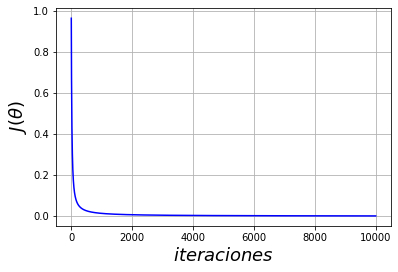

In [20]:
plt.plot(np.arange(n_iter), J_set, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [21]:
y_proba_set_AB =np.round(sigmoid(theta_setosa_AB.T @ x_test_AB.T),2)
y_proba_set_AB

array([[0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  ,
        0.  , 0.  , 1.  , 0.  , 0.  , 0.01, 1.  , 1.  , 1.  , 0.  , 1.  ,
        1.  , 0.  , 1.  , 0.  , 0.  ]])

In [22]:
eta = 0.8
n_iter = 10000
theta_versicolor_AB = np.random.randn(x_train_AB.shape[1]).reshape(x_train_AB.shape[1],1)
y_train_ver_AB = (y_train_AB == 1).astype(int)

theta_versicolor_AB, J_vers = gradiente(theta_versicolor_AB, x_train_AB, y_train_ver_AB)
theta_versicolor_AB

array([[-4.52766865],
       [ 5.71510038],
       [-9.26626044],
       [12.54511721],
       [11.72142482]])

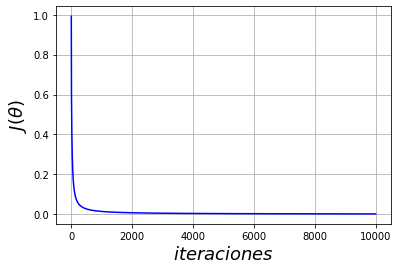

In [23]:
plt.plot(np.arange(n_iter), J_vers, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [24]:
y_proba_ver_AB =np.round(sigmoid(theta_versicolor_AB.T @ x_test_AB.T),2)
y_proba_ver_AB

array([[1.  , 0.  , 1.  , 1.  , 1.  , 0.  , 0.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 0.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.  , 1.  , 0.  ,
        1.  , 1.  , 0.  , 1.  , 1.  , 0.99, 0.  , 0.  , 0.  , 1.  , 0.  ,
        0.  , 1.  , 0.  , 1.  , 1.  ]])

In [25]:
last_data_AB, votar_AB = vector_comparacion(y_proba_set_AB,y_proba_ver_AB, 0 ,1)
last_data_AB

array([[0.  , 1.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [0.01, 0.99, 1.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 1.  ],
 

In [26]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# AC

## setosa vs  virginica

In [27]:
x_train[:10], x_test[:10]

(array([[0.75      , 0.5       , 0.62711864, 0.54166667],
        [0.58333333, 0.5       , 0.72881356, 0.91666667],
        [0.19444444, 0.58333333, 0.10169492, 0.125     ],
        [0.5       , 0.33333333, 0.50847458, 0.5       ],
        [0.22222222, 0.20833333, 0.33898305, 0.41666667],
        [0.47222222, 0.29166667, 0.69491525, 0.625     ],
        [0.47222222, 0.08333333, 0.6779661 , 0.58333333],
        [0.38888889, 0.25      , 0.42372881, 0.375     ],
        [0.30555556, 0.79166667, 0.05084746, 0.125     ],
        [0.66666667, 0.45833333, 0.62711864, 0.58333333]]),
 array([[0.55555556, 0.125     , 0.57627119, 0.5       ],
        [0.22222222, 0.75      , 0.10169492, 0.04166667],
        [0.61111111, 0.5       , 0.69491525, 0.79166667],
        [0.55555556, 0.54166667, 0.84745763, 1.        ],
        [0.38888889, 0.41666667, 0.54237288, 0.45833333],
        [0.22222222, 0.75      , 0.15254237, 0.125     ],
        [0.22222222, 0.75      , 0.08474576, 0.08333333],
        [0.5

In [28]:
num_index_x_train_AC = exclude_data(y_train, 1)
num_index_x_train_AC

array([  1,   2,   6,   8,  10,  11,  12,  13,  14,  15,  18,  19,  20,
        22,  24,  25,  28,  29,  30,  33,  34,  35,  37,  38,  40,  41,
        42,  43,  44,  46,  47,  48,  49,  50,  51,  52,  54,  55,  57,
        58,  61,  62,  63,  64,  65,  67,  68,  69,  71,  73,  74,  75,
        76,  78,  79,  80,  81,  83,  85,  87,  88,  95,  97,  98,  99,
       100, 101, 102, 104, 105, 106, 107, 109, 110])

In [29]:
x_train_AC = x_train[num_index_x_train_AC]
y_train_AC = y_train[num_index_x_train_AC]
x_train_AC[:10],  y_train_AC[:10]

(array([[0.58333333, 0.5       , 0.72881356, 0.91666667],
        [0.19444444, 0.58333333, 0.10169492, 0.125     ],
        [0.47222222, 0.08333333, 0.6779661 , 0.58333333],
        [0.30555556, 0.79166667, 0.05084746, 0.125     ],
        [0.52777778, 0.58333333, 0.74576271, 0.91666667],
        [0.11111111, 0.5       , 0.05084746, 0.04166667],
        [0.41666667, 0.29166667, 0.69491525, 0.75      ],
        [0.77777778, 0.41666667, 0.83050847, 0.83333333],
        [0.66666667, 0.41666667, 0.71186441, 0.91666667],
        [0.16666667, 0.41666667, 0.06779661, 0.04166667]]),
 array([[2],
        [0],
        [2],
        [0],
        [2],
        [0],
        [2],
        [2],
        [2],
        [0]]))

In [30]:
x_train_AC = np.c_[np.ones((len(x_train_AC),1)), x_train_AC]
x_test_AC = np.c_[np.ones((len(x_test),1)), x_test]

In [31]:
x_train_AC.shape

(74, 5)

In [32]:
n_iter = 10000

theta_setosa_AC = np.random.randn(x_train_AC.shape[1]).reshape(x_train_AC.shape[1],1)
y_train_set_AC = (y_train_AC == 0).astype(int)

theta_setosa_AC, J_set = gradiente(theta_setosa_AC, x_train_AC, y_train_set_AC)
theta_setosa_AC

array([[  5.7419623 ],
       [ -2.76426955],
       [  6.3398554 ],
       [ -8.37876234],
       [-10.66906502]])

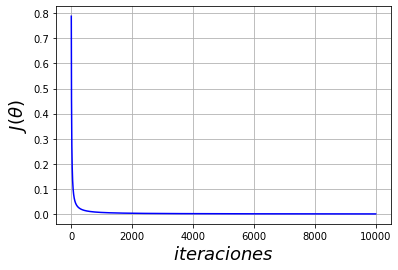

In [33]:
plt.plot(np.arange(n_iter), J_set, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [34]:
y_proba_set_AC =np.round(sigmoid(theta_setosa_AC.T @ x_test_AC.T),2)
y_proba_set_AC

array([[0.01, 1.  , 0.  , 0.  , 0.11, 1.  , 1.  , 0.01, 0.  , 0.12, 0.  ,
        0.  , 1.  , 0.  , 0.  , 0.03, 0.  , 0.  , 0.02, 1.  , 0.03, 1.  ,
        0.  , 0.  , 1.  , 0.08, 0.  , 0.22, 1.  , 1.  , 1.  , 0.01, 1.  ,
        1.  , 0.  , 1.  , 0.02, 0.02]])

In [35]:
eta = 0.8
n_iter = 10000
theta_virginica_AC = np.random.randn(x_train_AC.shape[1]).reshape(x_train_AC.shape[1],1)
y_train_ver_AC = (y_train_AC == 2).astype(int)

theta_virginica_AC, J_vir = gradiente(theta_virginica_AC, x_train_AC, y_train_ver_AC)
theta_virginica_AC

array([[-6.06976798],
       [ 4.84469653],
       [-6.1782725 ],
       [ 8.09710137],
       [10.0016126 ]])

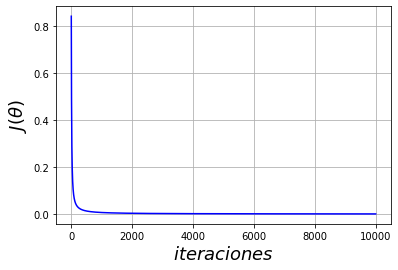

In [36]:
plt.plot(np.arange(n_iter), J_vir, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [37]:
y_proba_vir_AC =np.round(sigmoid(theta_virginica_AC.T @ x_test_AC.T),2)
y_proba_vir_AC

array([[1.  , 0.  , 1.  , 1.  , 0.9 , 0.  , 0.  , 0.99, 1.  , 0.88, 1.  ,
        1.  , 0.  , 1.  , 1.  , 0.98, 1.  , 1.  , 0.99, 0.  , 0.97, 0.  ,
        1.  , 1.  , 0.  , 0.93, 1.  , 0.73, 0.  , 0.  , 0.  , 0.99, 0.  ,
        0.  , 1.  , 0.  , 0.98, 0.98]])

In [38]:
last_data_AC, votar_AC = vector_comparacion(y_proba_set_AC,y_proba_vir_AC, 0 ,2)
last_data_AC

array([[0.01, 1.  , 2.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 2.  ],
       [0.  , 1.  , 2.  ],
       [0.11, 0.9 , 2.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.01, 0.99, 2.  ],
       [0.  , 1.  , 2.  ],
       [0.12, 0.88, 2.  ],
       [0.  , 1.  , 2.  ],
       [0.  , 1.  , 2.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 2.  ],
       [0.  , 1.  , 2.  ],
       [0.03, 0.98, 2.  ],
       [0.  , 1.  , 2.  ],
       [0.  , 1.  , 2.  ],
       [0.02, 0.99, 2.  ],
       [1.  , 0.  , 0.  ],
       [0.03, 0.97, 2.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 2.  ],
       [0.  , 1.  , 2.  ],
       [1.  , 0.  , 0.  ],
       [0.08, 0.93, 2.  ],
       [0.  , 1.  , 2.  ],
       [0.22, 0.73, 2.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.01, 0.99, 2.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 2.  ],
       [1.  , 0.  , 0.  ],
       [0.02, 0.98, 2.  ],
 

In [39]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# BC

## versicolor vs  virginica

In [40]:
x_train[:10], x_test[:10]

(array([[0.75      , 0.5       , 0.62711864, 0.54166667],
        [0.58333333, 0.5       , 0.72881356, 0.91666667],
        [0.19444444, 0.58333333, 0.10169492, 0.125     ],
        [0.5       , 0.33333333, 0.50847458, 0.5       ],
        [0.22222222, 0.20833333, 0.33898305, 0.41666667],
        [0.47222222, 0.29166667, 0.69491525, 0.625     ],
        [0.47222222, 0.08333333, 0.6779661 , 0.58333333],
        [0.38888889, 0.25      , 0.42372881, 0.375     ],
        [0.30555556, 0.79166667, 0.05084746, 0.125     ],
        [0.66666667, 0.45833333, 0.62711864, 0.58333333]]),
 array([[0.55555556, 0.125     , 0.57627119, 0.5       ],
        [0.22222222, 0.75      , 0.10169492, 0.04166667],
        [0.61111111, 0.5       , 0.69491525, 0.79166667],
        [0.55555556, 0.54166667, 0.84745763, 1.        ],
        [0.38888889, 0.41666667, 0.54237288, 0.45833333],
        [0.22222222, 0.75      , 0.15254237, 0.125     ],
        [0.22222222, 0.75      , 0.08474576, 0.08333333],
        [0.5

In [41]:
num_index_x_train_BC = exclude_data(y_train, 0)
num_index_x_train_BC

array([  0,   1,   3,   4,   5,   6,   7,   9,  10,  12,  13,  14,  16,
        17,  19,  21,  22,  23,  24,  26,  27,  28,  29,  30,  31,  32,
        36,  39,  40,  41,  43,  44,  45,  46,  49,  53,  56,  58,  59,
        60,  61,  63,  66,  67,  68,  70,  72,  74,  75,  76,  77,  80,
        82,  83,  84,  85,  86,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  99, 100, 102, 103, 104, 105, 108, 110, 111])

In [42]:
x_train_BC = x_train[num_index_x_train_BC]
y_train_BC = y_train[num_index_x_train_BC]
x_train_BC[:10],  y_train_BC[:10]

(array([[0.75      , 0.5       , 0.62711864, 0.54166667],
        [0.58333333, 0.5       , 0.72881356, 0.91666667],
        [0.5       , 0.33333333, 0.50847458, 0.5       ],
        [0.22222222, 0.20833333, 0.33898305, 0.41666667],
        [0.47222222, 0.29166667, 0.69491525, 0.625     ],
        [0.47222222, 0.08333333, 0.6779661 , 0.58333333],
        [0.38888889, 0.25      , 0.42372881, 0.375     ],
        [0.66666667, 0.45833333, 0.62711864, 0.58333333],
        [0.52777778, 0.58333333, 0.74576271, 0.91666667],
        [0.41666667, 0.29166667, 0.69491525, 0.75      ]]),
 array([[1],
        [2],
        [1],
        [1],
        [1],
        [2],
        [1],
        [1],
        [2],
        [2]]))

In [43]:
x_train_BC = np.c_[np.ones((len(x_train_BC),1)), x_train_BC]
x_test_BC = np.c_[np.ones((len(x_test),1)), x_test]

In [44]:
x_train_BC.shape

(75, 5)

In [45]:
n_iter = 10000

theta_versicolor_BC = np.random.randn(x_train_BC.shape[1]).reshape(x_train_BC.shape[1],1)
y_train_set_BC = (y_train_BC == 1).astype(int)

theta_versicolor_BC, J_set = gradiente(theta_versicolor_BC, x_train_BC, y_train_set_BC)
theta_versicolor_BC

array([[ 23.26334865],
       [  5.02406042],
       [  8.85992462],
       [-19.01216168],
       [-24.98817132]])

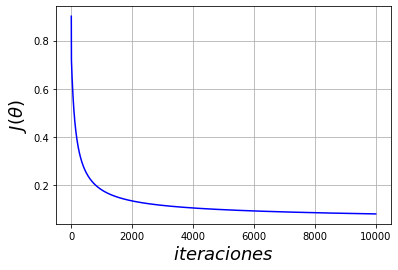

In [46]:
plt.plot(np.arange(n_iter), J_set, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [47]:
y_proba_ver_BC =np.round(sigmoid(theta_versicolor_BC.T @ x_test_BC.T),2)
y_proba_ver_BC

array([[0.98, 1.  , 0.1 , 0.  , 1.  , 1.  , 1.  , 0.97, 0.48, 1.  , 0.  ,
        0.1 , 1.  , 0.02, 0.01, 0.98, 0.77, 0.  , 1.  , 1.  , 0.99, 1.  ,
        0.15, 0.04, 1.  , 1.  , 0.  , 1.  , 1.  , 1.  , 1.  , 0.96, 1.  ,
        1.  , 0.  , 1.  , 0.98, 1.  ]])

In [48]:
n_iter = 10000

theta_virginica_BC = np.random.randn(x_train_BC.shape[1]).reshape(x_train_BC.shape[1],1)
y_train_set_BC = (y_train_BC == 2).astype(int)

theta_virginica_BC, J_set = gradiente(theta_virginica_BC, x_train_BC, y_train_set_BC)
theta_virginica_BC

array([[-23.03966234],
       [ -4.73581673],
       [ -8.98277542],
       [ 18.17680165],
       [ 25.34104874]])

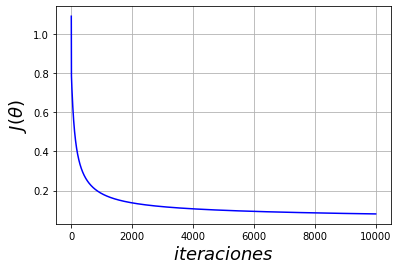

In [49]:
plt.plot(np.arange(n_iter), J_set, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [50]:
y_proba_vir_BC =np.round(sigmoid(theta_virginica_BC.T @ x_test_BC.T),2)
y_proba_vir_BC

array([[0.03, 0.  , 0.91, 1.  , 0.  , 0.  , 0.  , 0.03, 0.51, 0.  , 1.  ,
        0.9 , 0.  , 0.98, 0.99, 0.02, 0.22, 1.  , 0.  , 0.  , 0.01, 0.  ,
        0.84, 0.96, 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  ,
        0.  , 1.  , 0.  , 0.02, 0.  ]])

In [51]:
last_data_BC, votar_BC = vector_comparacion(y_proba_ver_BC,y_proba_vir_BC, 1 ,2)
last_data_BC

array([[0.98, 0.03, 1.  ],
       [1.  , 0.  , 1.  ],
       [0.1 , 0.91, 2.  ],
       [0.  , 1.  , 2.  ],
       [1.  , 0.  , 1.  ],
       [1.  , 0.  , 1.  ],
       [1.  , 0.  , 1.  ],
       [0.97, 0.03, 1.  ],
       [0.48, 0.51, 2.  ],
       [1.  , 0.  , 1.  ],
       [0.  , 1.  , 2.  ],
       [0.1 , 0.9 , 2.  ],
       [1.  , 0.  , 1.  ],
       [0.02, 0.98, 2.  ],
       [0.01, 0.99, 2.  ],
       [0.98, 0.02, 1.  ],
       [0.77, 0.22, 1.  ],
       [0.  , 1.  , 2.  ],
       [1.  , 0.  , 1.  ],
       [1.  , 0.  , 1.  ],
       [0.99, 0.01, 1.  ],
       [1.  , 0.  , 1.  ],
       [0.15, 0.84, 2.  ],
       [0.04, 0.96, 2.  ],
       [1.  , 0.  , 1.  ],
       [1.  , 0.  , 1.  ],
       [0.  , 1.  , 2.  ],
       [1.  , 0.  , 1.  ],
       [1.  , 0.  , 1.  ],
       [1.  , 0.  , 1.  ],
       [1.  , 0.  , 1.  ],
       [0.96, 0.04, 1.  ],
       [1.  , 0.  , 1.  ],
       [1.  , 0.  , 1.  ],
       [0.  , 1.  , 2.  ],
       [1.  , 0.  , 1.  ],
       [0.98, 0.02, 1.  ],
 

In [52]:
votar_AB.T, votar_AC.T, votar_BC.T, y_test.T

(array([[1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
         1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1]]),
 array([[2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0,
         2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2]]),
 array([[1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1,
         2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]]),
 array([[1, 0, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2, 1, 0, 1, 0,
         2, 2, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 2, 0, 1, 1]]))

In [53]:
vote_data = np.concatenate((votar_AB, votar_AC, votar_BC), axis =1)
vote_data

array([[1, 2, 1],
       [0, 0, 1],
       [1, 2, 2],
       [1, 2, 2],
       [1, 2, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 2, 1],
       [1, 2, 2],
       [1, 2, 1],
       [1, 2, 2],
       [1, 2, 2],
       [0, 0, 1],
       [1, 2, 2],
       [1, 2, 2],
       [1, 2, 1],
       [1, 2, 1],
       [1, 2, 2],
       [1, 2, 1],
       [0, 0, 1],
       [1, 2, 1],
       [0, 0, 1],
       [1, 2, 2],
       [1, 2, 2],
       [0, 0, 1],
       [1, 2, 1],
       [1, 2, 2],
       [1, 2, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 2, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 2, 2],
       [0, 0, 1],
       [1, 2, 1],
       [1, 2, 1]])

In [54]:
data = []

for i in range(len(vote_data)):   
    values, votes = np.unique(vote_data[i], return_counts=True)
    index_winner = votes.argmax()
    data.append(values[index_winner])
data = np.array(data)
np.concatenate((data.reshape(len(data), 1), y_test), axis =1)

array([[1, 1],
       [0, 0],
       [2, 2],
       [2, 2],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [2, 2],
       [1, 1],
       [1, 2],
       [2, 2],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [2, 2],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1]])

In [55]:
cm = confusion_matrix(y_test , data)
cm

array([[13,  0,  0],
       [ 0, 12,  0],
       [ 0,  1, 12]], dtype=int64)

In [56]:
actual = 0
total = 0

for i in range(len(cm)):
    for j in range(len(cm[i])):
        if i == j:
            actual = cm[i][j] + actual
        total = cm[i][j] + total
actual / total

0.9736842105263158

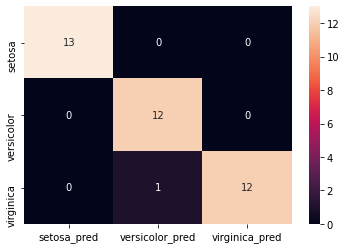

In [57]:
y_axis_labels = iris["target_names"]
x_axis_labels = ['setosa_pred', 'versicolor_pred', 'virginica_pred']
cm = confusion_matrix(y_test , data)
f = sns.heatmap(cm, annot=True,  xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [58]:
print(classification_report(y_test, data, target_names= iris["target_names"]))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.92      1.00      0.96        12
   virginica       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

